<a href="https://colab.research.google.com/github/salmanali88/Lung-Cancer/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import  cifar10

In [ ]:
#kaggle installing API
!pip install -q kaggle

In [ ]:
#create directory 
!mkdir -p ~/.kaggle

In [ ]:
#importing API to colab
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
#disbale key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
 #importing the dataset
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images 

chest-ctscan-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzipping dataset
! unzip -q /content/chest-ctscan-images.zip

In [ ]:
#defining the object
model=tf.keras.models.Sequential()

In [ ]:
#Adding First CNN Layer
# 1. Filters (kernel) = 64
# 2. kernel size = 3
# 3. padding = same
# 4. activation = ReLU
# 5. input shape = (32, 32, 3)
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=4,padding='same',activation='relu',input_shape=[64,64,3]))

In [ ]:
#maxpool layer parameters
# 1. pool size =2
# 2. strides = 2
# 3. padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2 , padding='valid'))

In [ ]:
 #Adding Second CNN Layer
# 1. Filters (kernel) = 32
# 2. kernel size = 3
# 3. padding = same
# 4. activation = ReLU
#model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',))
#model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides=2 , padding='valid'))

In [ ]:
#Adding Flattening Layer
#Converting array into vectors
model.add(tf.keras.layers.Flatten())

In [ ]:
#Adding the dropout Layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
#Adding first dense fayer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
#Adding first dense fayer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        65600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_dir='/content/Data/train'

In [ ]:
test_data_dir = '/content/Data/test'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
traning_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32),class_mode='categorical',batch_size=20
                                          )

Found 613 images belonging to 4 classes.


In [ ]:
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32),class_mode='binary',batch_size=20
                                          )

Found 315 images belonging to 4 classes.


In [ ]:
len(traning_set),len(test_set)

(31, 16)

In [ ]:
test_set.batch_size

20

In [ ]:
history = model.fit_generator(generator=traning_set, steps_per_epoch=31,epochs=20, validation_data=test_set, validation_steps=16)

Epoch 1/20
31/31 [==============================] - 7s 213ms/step - loss: 0.5626 - accuracy: 0.7500 - val_loss: 1.8148 - val_accuracy: 0.3810
Epoch 2/20
31/31 [==============================] - 6s 208ms/step - loss: 0.5626 - accuracy: 0.7500 - val_loss: 1.7662 - val_accuracy: 0.3810
Epoch 3/20
31/31 [==============================] - 7s 210ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 1.7839 - val_accuracy: 0.3810
Epoch 4/20
31/31 [==============================] - 7s 211ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 1.8109 - val_accuracy: 0.3810
Epoch 5/20
31/31 [==============================] - 7s 210ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 1.7890 - val_accuracy: 0.3810
Epoch 6/20
31/31 [==============================] - 6s 208ms/step - loss: 0.5626 - accuracy: 0.7500 - val_loss: 1.7294 - val_accuracy: 0.3810
Epoch 7/20
31/31 [==============================] - 6s 209ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 1.7673 - val_accuracy: 0.3810
Epoch 

In [ ]:
def learning_curve(history,epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.legend(['Accuracy','Val_Accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.show


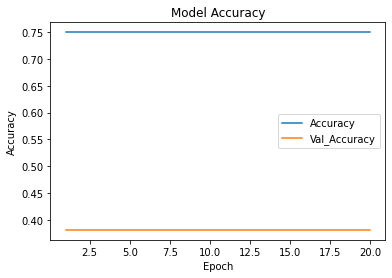

In [ ]:
learning_curve(history, 20) 

In [ ]:
def learning_curve1(history,epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Accuracy')
  plt.legend(['Loss','Val_Loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show


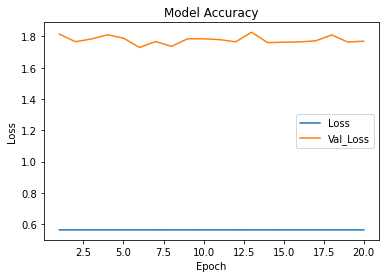

In [ ]:
learning_curve1(history, 20) 

In [ ]:
loss , accuracy=model.evaluate(test_set) 

16/16 [==============================] - 2s 108ms/step - loss: 1.7696 - accuracy: 0.3810


In [ ]:
y_pred=np.argmax(model.predict_classes(test_set))

In [ ]:
y_pred

0

In [ ]:
test_set